# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

# Load Dataset

Sumber Dataset : http://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving forestfires (3).csv to forestfires (3).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['forestfires (3).csv']))
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0610b337d0>]],
      dtype=object)

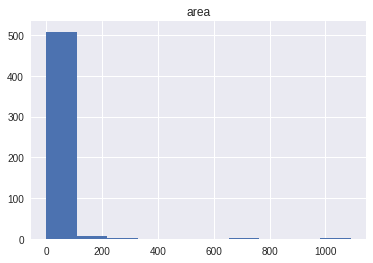

In [ ]:
df.hist(column='area')

## Add a new column = `size_category`

- `size_category` mengkategorikan jenis kebakaran hutan yang terjadi 

 * Jika nilai dari variabel `area` < 6 maka `size_category` akan berlabel 0 (Kebakaran Kecil)
 * jika var nilai variabel `area` >= 6 maka `size_category` akan berlabel 1 (Kebakaran Besar)

In [ ]:
df['size_category'] = np.where(df['area']>6, '1', '0')
df.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


**Attribute Information:**


   1. X : x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y : y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month : month of the year: "jan" to "dec" 
   4. day : day of the week: "mon" to "sun"
   5. FFMC : FFMC index (Fine Fuel Moisture Code) from the FWI system: 18.7 to 96.20 -> Kelembaban Bahan Bakar
   6. DMC : DMC index (Duff Moisture Code) from the FWI system: 1.1 to 291.3 -> Kelembapan Duff
   7. DC : DC index (Drought Code) from the FWI system: 7.9 to 860.6  -> Kekeringan
   8. ISI : ISI index (Initial Spread Index) from the FWI system: 0.0 to 56.10 (related to wind and FFMC) -> Index penyebaran awal
   9. temp : temperature in Celsius degrees: 2.2 to 33.30
   10. RH : relative humidity in %: 15.0 to 100
   11. wind : wind speed in km/h: 0.40 to 9.40 
   12. rain : outside rain in mm/m2 : 0.0 to 6.4 
   13. area : the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

   14. size_category : label if area < 6 = 0 else 1 

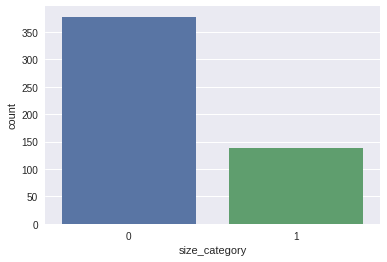

In [ ]:
sns.countplot(x="size_category", data=df)

# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   month          517 non-null    object 
 3   day            517 non-null    object 
 4   FFMC           517 non-null    float64
 5   DMC            517 non-null    float64
 6   DC             517 non-null    float64
 7   ISI            517 non-null    float64
 8   temp           517 non-null    float64
 9   RH             517 non-null    int64  
 10  wind           517 non-null    float64
 11  rain           517 non-null    float64
 12  area           517 non-null    float64
 13  size_category  517 non-null    object 
dtypes: float64(8), int64(3), object(3)
memory usage: 56.7+ KB


In [ ]:
df['size_category']=pd.to_numeric(df['size_category'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   month          517 non-null    object 
 3   day            517 non-null    object 
 4   FFMC           517 non-null    float64
 5   DMC            517 non-null    float64
 6   DC             517 non-null    float64
 7   ISI            517 non-null    float64
 8   temp           517 non-null    float64
 9   RH             517 non-null    int64  
 10  wind           517 non-null    float64
 11  rain           517 non-null    float64
 12  area           517 non-null    float64
 13  size_category  517 non-null    int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 56.7+ KB


In [ ]:
print('Total Data:', df.shape[0])
print('Total Features:', df.shape[1])

Total Data: 517
Total Features: 14


### Check Null Values

In [ ]:
df.isnull().sum()

X                0
Y                0
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

Dataset tidak memiliki *missing values*.

Check apakah nilai-nilai dari variabel *reasonable.*

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


Tidak ditemukan fitur yang tampaknya memiliki rentang luar biasa.

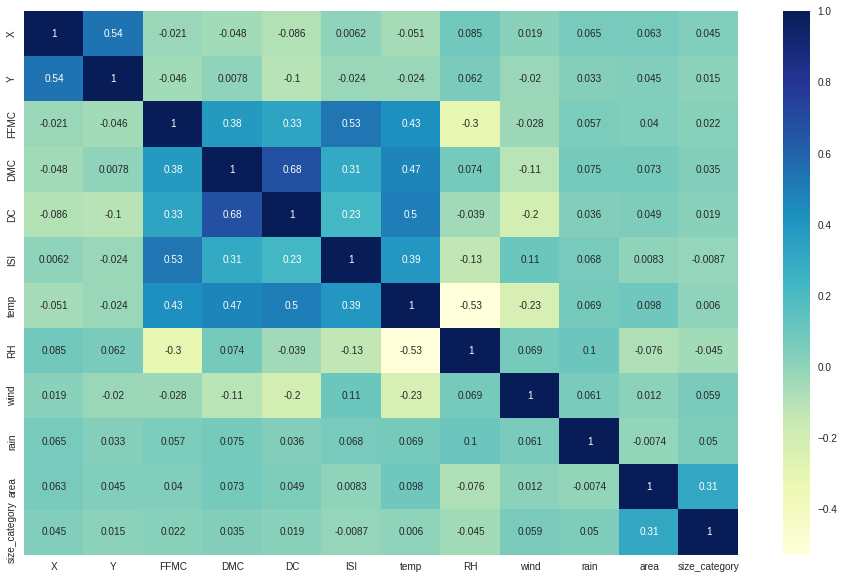

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Data Preprocessing

## 1) Data Preprocessing Month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of months')

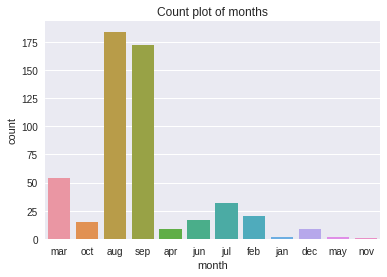

In [ ]:
sns.countplot(df['month'])
plt.title('Count plot of months')

* Data terlihat sebagian besar *skewed* atau condong ke bulan **August** dan **September** (yang mana merupakan musim *summer* di Portugal)

* Oleh karena ukuran dataset yang digunakan hanya 517 baris, kecil kemungkinan akan diperoleh banyak informasi dengan mengkodekan 12 bulan dengan variabel *dummy*.

* Sebagai gantinya, langkah yang dilakukan selanjutnya : berupa memisahkan data `month` menjadi 4 kategori musim:  Spring, Summer, Autumn dan Winter. (Terdapat kemungkinan musim memiliki peluang bagus untuk bisa dikorelasikan dengan suhu dan hujan)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of seasons')

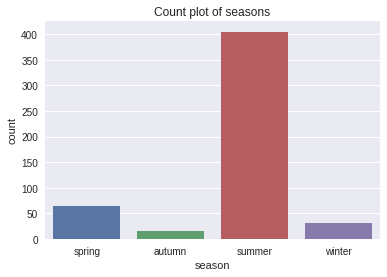

In [ ]:
# dictionary of months mapping to seasons
season_dict = {'dec' : 'winter', 'jan' : 'winter', 'feb' : 'winter',
              'mar' : 'spring', 'apr' : 'spring', 'may' : 'spring',
              'jun' : 'summer', 'jul' : 'summer', 'aug' : 'summer', 'sep' : 'summer',
              'oct' : 'autumn', 'nov' : 'autumn'}

# applying dictionary
df = df.replace({'month' : season_dict})

# renaming column
df = df.rename(columns = {'month' : 'season'})

# visualizing data
sns.countplot(df['season'])
plt.title('Count plot of seasons')

Tampaknya kategori musim *Summer* memiliki skew yang terlalu besar. Untuk mengatasi hal ini, akan dilakukan pengkategorian lanjutan berupa *'summer'* or *'not summer'*.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of summer vs other seasons')

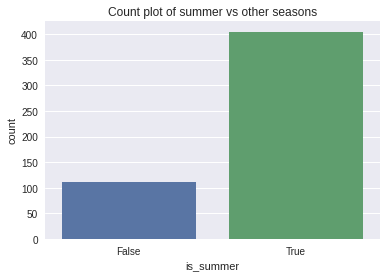

In [ ]:
# converting to is summer
df['season'] = (df['season'] == 'summer')

# renaming column
df = df.rename(columns = {'season' : 'is_summer'})

# visualizing data
sns.countplot(df['is_summer'])
plt.title('Count plot of summer vs other seasons')

## 2) Data Preprocessing Days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of days')

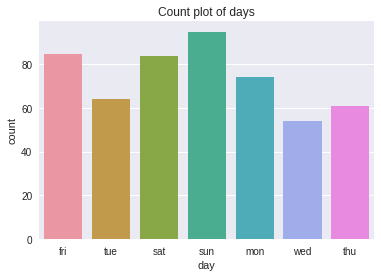

In [ ]:
sns.countplot(df['day'])
plt.title('Count plot of days')

* Distribusi untuk variabel `days` terlihat cukup baik. Akan tetapi, akan dilakukan pemisahan kategori hari menjadi *weekend* dan *not weekend*. 

* Alasan di balik ini adalah bahwa jumlah area yang terbakar dalam kebakaran juga terkait dengan bagaimana petugas pemadam kebakaran merespons api. Selama akhir pekan, jumlah petugas pemadam kebakaran atau respons secara umum mungkin berbeda dibandingkan pada hari kerja.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of weekend vs weekday')

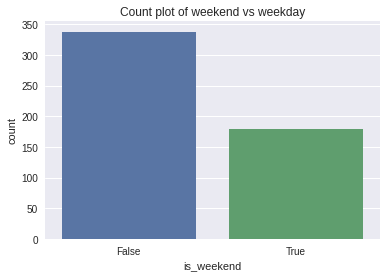

In [ ]:
# converting to is weekend
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat'))

# renaming column
df = df.rename(columns = {'day' : 'is_weekend'})

# visualizing
sns.countplot(df['is_weekend'])
plt.title('Count plot of weekend vs weekday')

skew tidak terlalu besar.

## 3) Distribution of Each Columns

Langkah selanjutnya melihat distribusi masing-masing column

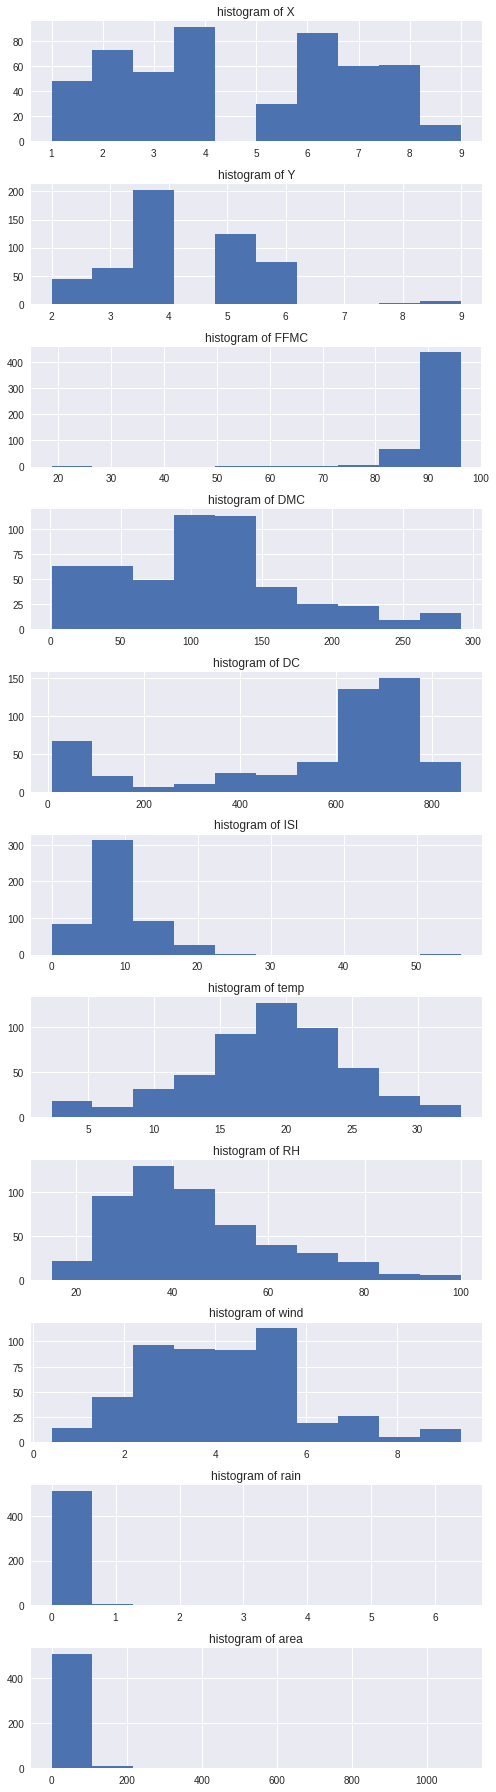

In [ ]:
# subplots
fig, ax = plt.subplots(11, figsize = (7,25))

# initial index
index = 0
unused_column = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# visualizing
for column in unused_column:
    if column != 'is_summer':
        ax[index].hist(df[column])
        ax[index].title.set_text('histogram of ' + column)
        index += 1

# making plots visible
plt.tight_layout()

* Dapat dilihat bahwa sebagian besar distribusi terlihat relatif mendekati distribusi normal. 

* However, `X` and `Y` have no patterns for distribution which makes sense since we do not know the geography of the natural park. This means that we do not know where the trees are for fires so the distribution is not normal. We, however, can not do anything about this other than drop the features so we will keep them for now and see if they become problematic in the future. 

* Distribusi dari variabel `rain` and `area` terlalu skewed dan memiliki outliers, maka akan dilakukan scaling pada kedua variabel tersebut.

## 4) Scaling `Area` and `Rain`

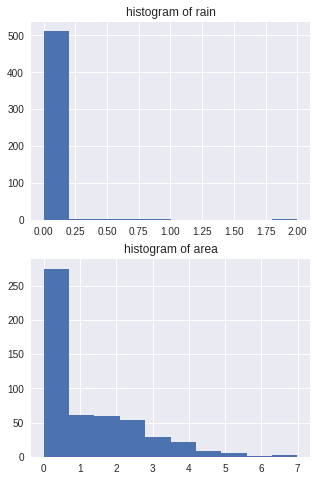

In [ ]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)

# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))

ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')

ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

* Hasil scaling dari variabel `rain` terlihat tidak cukup baik, akan tetapi untuk variabel `area` distribusinya meningkat cukup tinggi.


## 5) Train Test Split

In [ ]:
features = df.drop(['size_category'], axis = 1)
labels = df['size_category'].values.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size = 0.2,
                                                    random_state = 42)

## 6) Feature Scaling: StandardScaler

In [ ]:
# fitting scaler
sc_features = StandardScaler()

# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)

In [ ]:
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)

# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])

In [ ]:
X_train.head()

,X,Y,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.293766,-0.927776,0.53287,1.404076,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,0.219260
1,-0.293766,-0.161993,0.53287,-0.712212,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,0.177491
2,-1.130796,0.603791,0.53287,-0.712212,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,0.180797
3,-0.712281,-0.161993,0.53287,-0.712212,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.087255
4,0.124750,-0.161993,-1.87663,1.404076,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,0.578923


In [ ]:
y_train

,size_category
0,0
1,0
2,0
3,1
4,1
...,...
408,0
409,0
410,0
411,0


In [ ]:
y_test

,size_category
0,0
1,0
2,0
3,0
4,0
...,...
99,0
100,0
101,0
102,1


# Eksperimen

## 1) Eksperimen 1 : Base Model

### Modelling

#### 1) Define Model

In [ ]:
model = Sequential()

In [ ]:
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=13, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


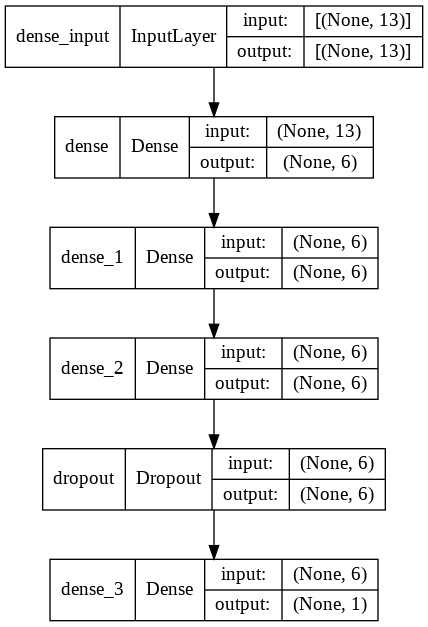

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### 2) Compile Model

In [ ]:
model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'binary_crossentropy')

#### 3) Train Model

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test), 
                    batch_size = 10,
                    epochs = 100)

Epoch 1/100
42/42 [==============================] - 3s 12ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 3/100
42/42 [==============================] - 0s 7ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 4.1457 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 8/100


In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.731, Valid: 0.731


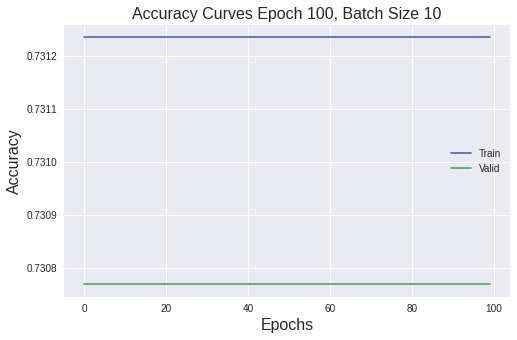

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)

plt.show()

## 2) Eksperimen 2 : Base Model (drop X and Y) 

In [ ]:
features_coba = df.drop(['size_category','X','Y'], axis = 1)
labels_coba = df['size_category'].values.reshape(-1, 1)

In [ ]:
features_coba

,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,86.2,26.2,94.3,5.1,8.2,51,6.7,0.000000,0.000000
1,False,False,90.6,35.4,669.1,6.7,18.0,33,0.9,0.000000,0.000000
2,False,True,90.6,43.7,686.9,6.7,14.6,33,1.3,0.000000,0.000000
3,False,False,91.7,33.3,77.5,9.0,8.3,97,4.0,0.182322,0.000000
4,False,True,89.3,51.3,102.2,9.6,11.4,99,1.8,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
512,True,True,81.6,56.7,665.6,1.9,27.8,32,2.7,0.000000,2.006871
513,True,True,81.6,56.7,665.6,1.9,21.9,71,5.8,0.000000,4.012592
514,True,True,81.6,56.7,665.6,1.9,21.2,70,6.7,0.000000,2.498152
515,True,True,94.4,146.0,614.7,11.3,25.6,42,4.0,0.000000,0.000000


In [ ]:
X_train_coba, X_test_coba, y_train_coba, y_test_coba = train_test_split(features_coba,
                                                                        labels_coba,
                                                                        test_size = 0.2,
                                                                        random_state = 42)

In [ ]:
# fitting scaler
sc_features = StandardScaler()

# transforming features
X_test_coba = sc_features.fit_transform(X_test_coba)
X_train_coba = sc_features.transform(X_train_coba)

In [ ]:
# features
X_test_coba = pd.DataFrame(X_test_coba, columns = features_coba.columns)
X_train_coba = pd.DataFrame(X_train_coba, columns = features_coba.columns)

# labels
y_test_coba = pd.DataFrame(y_test_coba, columns = ['size_category'])
y_train_coba = pd.DataFrame(y_train_coba, columns = ['size_category'])

In [ ]:
X_train_coba.head()

,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.53287,1.404076,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,0.219260
1,0.53287,-0.712212,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,0.177491
2,0.53287,-0.712212,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,0.180797
3,0.53287,-0.712212,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.087255
4,-1.87663,1.404076,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,0.578923


In [ ]:
model_coba = Sequential()

In [ ]:
# input layer + 1st hidden layer
model_coba.add(Dense(6, input_dim=11, activation='relu'))
# 2nd hidden layer
model_coba.add(Dense(6, activation='relu'))
# output layer
model_coba.add(Dense(6, activation='sigmoid'))
model_coba.add(Dropout(0.2))
model_coba.add(Dense(1, activation = 'relu'))

In [ ]:
model_coba.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 72        
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_coba.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'binary_crossentropy')

In [ ]:
history_coba = model_coba.fit(X_train_coba,
                    y_train_coba,
                    validation_data = (X_test_coba, y_test_coba), 
                    batch_size = 10,
                    epochs = 100)

Epoch 1/100
42/42 [==============================] - 1s 10ms/step - loss: 3.9847 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 2/100
42/42 [==============================] - 0s 7ms/step - loss: 3.8559 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 3.6969 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 3.5223 - accuracy: 0.7312 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 5/100
42/42 [==============================] - 0s 7ms/step - loss: 3.5524 - accuracy: 0.7264 - val_loss: 4.1529 - val_accuracy: 0.7308
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 3.1532 - accuracy: 0.7312 - val_loss: 3.4632 - val_accuracy: 0.7308
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 2.3845 - accuracy: 0.7312 - val_loss: 2.5471 - val_accuracy: 0.7308
Epoch 8/100


In [ ]:
_, train_acc_coba = model_coba.evaluate(X_train_coba, y_train_coba, verbose=0)
_, valid_acc_coba = model_coba.evaluate(X_test_coba, y_test_coba, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc_coba, valid_acc_coba))

Train: 0.973, Valid: 0.962


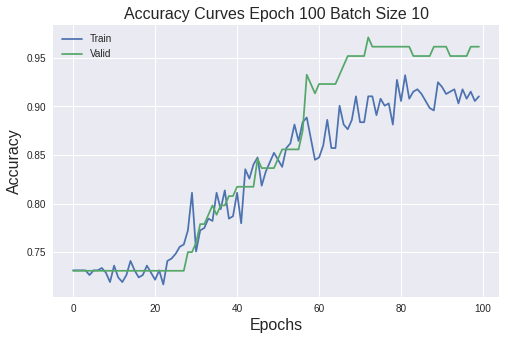

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history_coba.history['accuracy'], label='Train')
plt.plot(history_coba.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100 Batch Size 10', fontsize=16)

plt.show()

## 3) Eksperimen 3 : Batch Size = 4, 6, 10, 16, 32, 64, 128, 260

In [ ]:
X_train

,X,Y,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.293766,-0.927776,0.53287,1.404076,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,0.219260
1,-0.293766,-0.161993,0.53287,-0.712212,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,0.177491
2,-1.130796,0.603791,0.53287,-0.712212,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,0.180797
3,-0.712281,-0.161993,0.53287,-0.712212,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.087255
4,0.124750,-0.161993,-1.87663,1.404076,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,0.578923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,-0.293766,0.603791,0.53287,-0.712212,0.989785,-0.366247,0.623858,0.911963,-0.203920,-0.411443,-0.273919,-0.137348,-0.769306
409,-0.293766,0.603791,-1.87663,-0.712212,0.096550,-1.334146,-1.915992,-0.388332,-0.118749,-0.939716,-0.548365,-0.137348,-0.769306
410,-1.130796,-1.693559,0.53287,-0.712212,0.312158,0.834731,0.483714,0.664288,0.494487,0.843205,-0.548365,-0.137348,-0.486874
411,-1.130796,0.603791,0.53287,1.404076,-0.088257,-0.373364,-0.673602,-0.682447,0.835173,0.513034,-1.261926,-0.137348,-0.769306


In [ ]:
# Fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, n_batch):
  # Define Model
  model = Sequential()
  model.add(Dense(6, input_dim=13, activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(6, activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'relu'))

  # Compile Model
  model.compile(optimizer = 'adam',
                metrics=['accuracy'],
                loss = 'binary_crossentropy')
  
  # Fit Model
  history = model.fit(X_train,
                      y_train,
                      validation_data=(X_test, y_test),
                      epochs=100,
                      verbose=0,
                      batch_size=n_batch)

  # Plot Learning Curves
  plt.plot(history.history['accuracy'], label='train') 
  plt.plot(history.history['val_accuracy'], label='test') 
  plt.title('batch='+str(n_batch)) 
  plt.legend()  

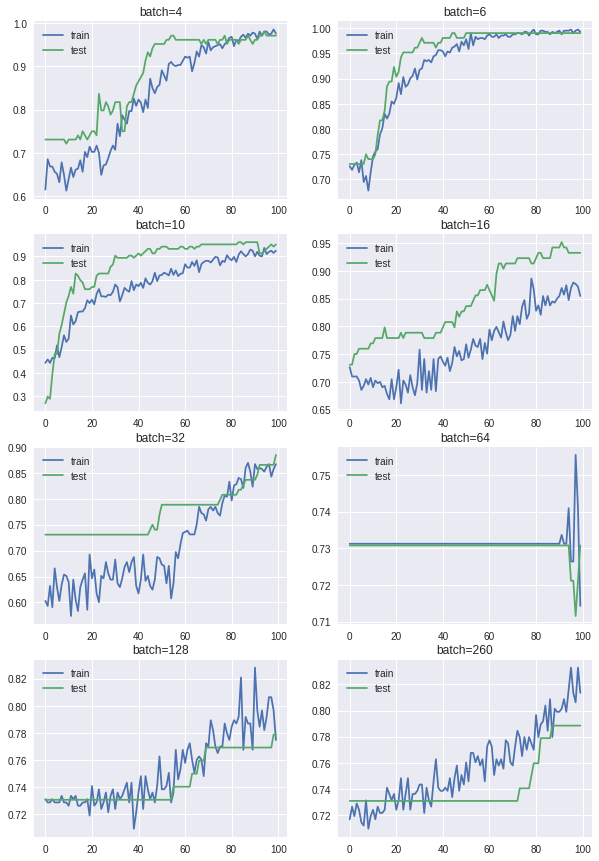

In [ ]:
# Create learning curves for different batch sizes
batch_sizes = [4, 6, 10, 16, 32, 64, 128, 260]

plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):

  # Determine the Plot Number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)

  # Fit model and plot learning curves for a batch size
  fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])

# Show learning curves
plt.show()

## 4) Eksperimen 4 : Batch Size = 6, Epochs = 20, 50, 100, 120, 150, 200, 300, 400

In [ ]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, n_epoch):
    
    # define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))
    
    # compile model

    model.compile(optimizer ='adam',
                  metrics=['accuracy'],
                  loss = 'binary_crossentropy')
    
    # fit model
    history = model.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        epochs=n_epoch,
                        verbose=0,
                        batch_size=6)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.legend()

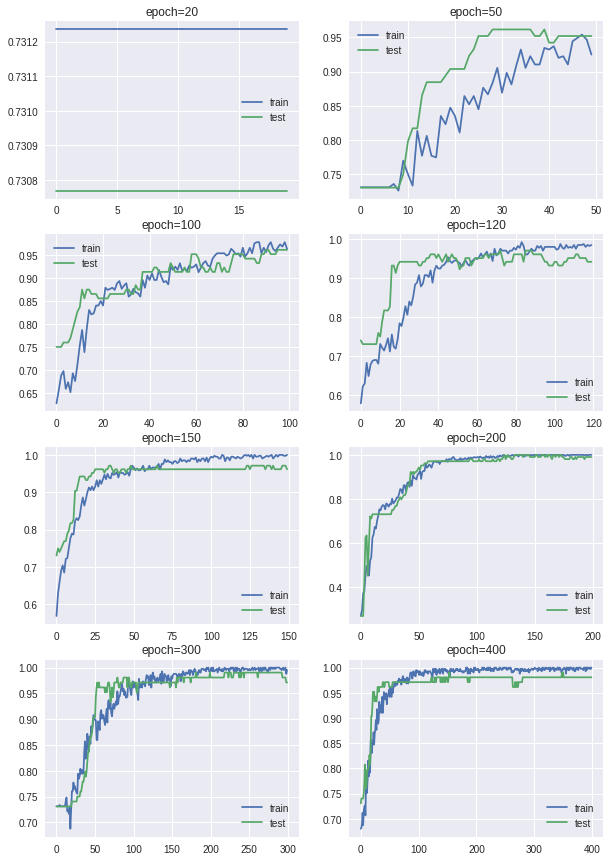

In [ ]:
# Create learning curves for different batch sizes
epochs = [20, 50, 100, 120, 150, 200, 300, 400]

plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):

  # Determine the Plot Number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)

  # Fit model and plot learning curves for a batch size
  fit_model(X_train, y_train, X_test, y_test, epochs[i])

# Show learning curves
plt.show()

## 5) Eksperimen 5 : Early Stopping (Patience, Model Checkpoint)

In [ ]:
def init_model():

    # define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))
    
    model.compile(optimizer ='adam',
                  metrics=['accuracy'],
                  loss = 'binary_crossentropy')
    
    return model

In [ ]:
# init model
model = init_model()

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=150)

In [ ]:
mc = ModelCheckpoint('best_model.h5',
                     monitor='val_accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=250,
                    verbose=0,
                    batch_size=6,
                    callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.73077, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.73077

Epoch 00003: val_accuracy did not improve from 0.73077

Epoch 00004: val_accuracy did not improve from 0.73077

Epoch 00005: val_accuracy did not improve from 0.73077

Epoch 00006: val_accuracy did not improve from 0.73077

Epoch 00007: val_accuracy did not improve from 0.73077

Epoch 00008: val_accuracy did not improve from 0.73077

Epoch 00009: val_accuracy did not improve from 0.73077

Epoch 00010: val_accuracy did not improve from 0.73077

Epoch 00011: val_accuracy did not improve from 0.73077

Epoch 00012: val_accuracy did not improve from 0.73077

Epoch 00013: val_accuracy did not improve from 0.73077

Epoch 00014: val_accuracy did not improve from 0.73077

Epoch 00015: val_accuracy improved from 0.73077 to 0.74038, saving model to best_model.h5

Epoch 00016: val_accuracy did not improve from 0.74038

Epoch 00017: val_accuracy improved f

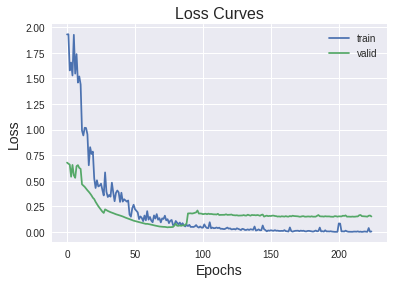

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

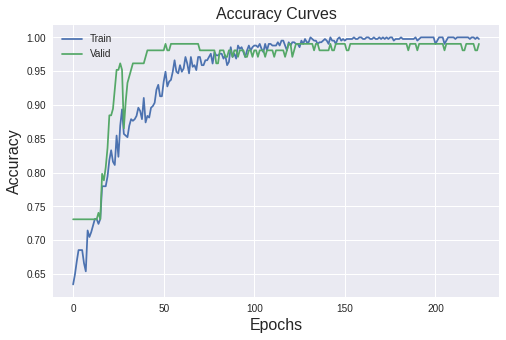

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.973, Valid: 0.990


## 6) Eksperimen 6 : Optimizer = SGD, lr = 0.1, momentum= 0.9, Early Stoppping (Patience, Model Checkpoint)

In [ ]:
def fit_model_with_momentum(X_train, y_train, X_test, y_test, momentum):

    # define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))

    # compile model
    opt = SGD(lr=0.1, momentum=momentum)
    model.compile(optimizer = opt,
                  metrics=['accuracy'],
                  loss = 'binary_crossentropy')

    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=394, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum))
    plt.legend()


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, 

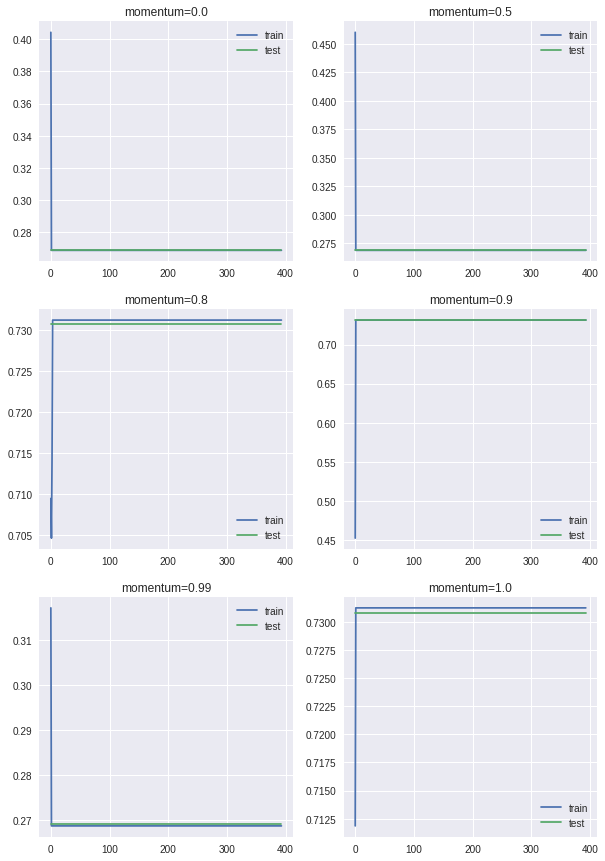

In [ ]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0] # use momentum values close to 1.0

plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model_with_momentum(X_train, y_train, X_test, y_test, momentums[i])

# show learning curves
plt.show()

**Model Checkpoint:**

In [ ]:
def init_model():

    # define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))
    opt = SGD(lr=0.1, momentum=0.9)
    model.compile(optimizer = opt,
                  metrics=['accuracy'],
                  loss = 'binary_crossentropy')
    
    return model

In [ ]:
# init model
model = init_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=200)

In [ ]:
mc = ModelCheckpoint('best_model_2.h5',
                     monitor='val_accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=394,
                    verbose=0,
                    callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.73077, saving model to best_model_2.h5

Epoch 00002: val_accuracy did not improve from 0.73077

Epoch 00003: val_accuracy did not improve from 0.73077

Epoch 00004: val_accuracy did not improve from 0.73077

Epoch 00005: val_accuracy did not improve from 0.73077

Epoch 00006: val_accuracy did not improve from 0.73077

Epoch 00007: val_accuracy did not improve from 0.73077

Epoch 00008: val_accuracy did not improve from 0.73077

Epoch 00009: val_accuracy did not improve from 0.73077

Epoch 00010: val_accuracy did not improve from 0.73077

Epoch 00011: val_accuracy did not improve from 0.73077

Epoch 00012: val_accuracy did not improve from 0.73077

Epoch 00013: val_accuracy did not improve from 0.73077

Epoch 00014: val_accuracy did not improve from 0.73077

Epoch 00015: val_accuracy did not improve from 0.73077

Epoch 00016: val_accuracy did not improve from 0.73077

Epoch 00017: val_accuracy did not improve from 0.73077

Epoch 00018: 

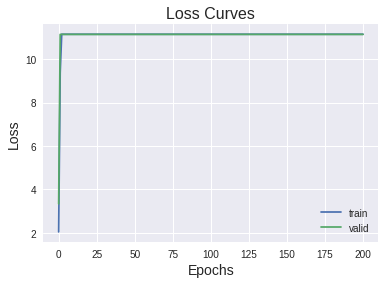

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

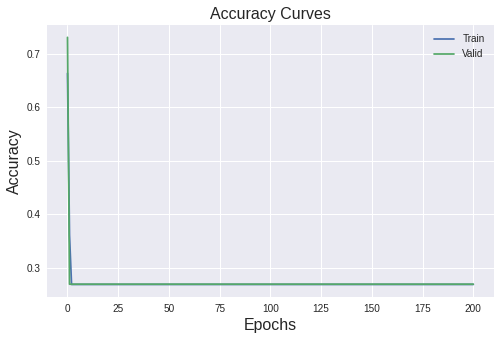

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [ ]:
from keras.models import load_model
model = load_model('best_model_2.h5')

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.731, Valid: 0.731


**Referensi :**

* Data Preprocessing : https://github.com/psohn/Only-You-Can-Prevent-Forest-Fires/blob/master/1.0_prs_preprocessing_eda.ipynb

* Modelling ANN : https://github.com/psohn/Only-You-Can-Prevent-Forest-Fires/blob/master/3.0_prs_artificial_neural_network.ipynb